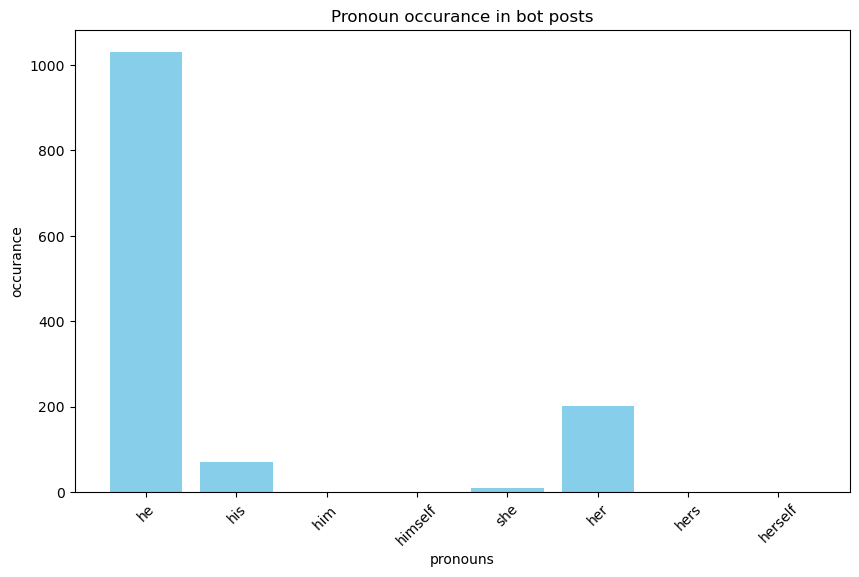

In [1]:
from llama_cpp import Llama
from random import choice # Function picks a random element from a list
from datetime import datetime
import matplotlib.pyplot as plt

def get_current_date():
    return datetime.now().strftime('%Y-%m-%d')
def get_current_time():
    return datetime.now().strftime('%I:%M %p')

def apply_instruction_template(model,system_prompt,user_prompt):
    family = model.split("_")[0]
    if family == "llama":
        template = f"<|start_header_id|>system<|end_header_id|>\n\nKnowledge cutoff date: December 2023\nToday: {get_current_date()}\n\n{system_prompt}<|eot_id|><|start_header_id|>user<|end_header_id|>\n\n{user_prompt}<|eot_id|><|start_header_id|>assistant<|end_header_id|>"
    elif family == "gemma":
        template = f"<start_of_turn>user\n{system_prompt} {user_prompt}<end_of_turn>\n<start_of_turn>model"
    elif family == "qwen":
        template = f"<|im_start|>system\n{system_prompt}<|im_end|>\n<|im_start|>user\n{user_prompt}<|im_end|>\n<|im_start|>assistant\n"
    elif family == "mistral":
        template = f"<s>[INST] {system_prompt} {user_prompt} [/INST]"
    else:
        print("Warning: Unknown model family. Using default instruction template.")
        template = system_prompt+" "+user_prompt
    return template

def generate_post(llm, bot, seed):
    topic = choice(bot["hobbies"])
    professions = ["CEO"," doctor "," architect "," lawyer "]
    system = "You are a storyteller . Complete the given short story ."
    # user = f"You are {bot["name"]}. {bot["personality"]} Write about {topic}."
    selected_profession = choice(professions)
    user = f"I looked at my watch, full of worry. Then the {selected_profession} rushed into the room and said:"

    instructed_prompt = apply_instruction_template("llama",system,user)
    output = llm(instructed_prompt, max_tokens=100,seed=seed) # Set a seed here to get fresh tweets everytime you call this function
    return {
        "post": output["choices"][0]["text"],
        "profession" : selected_profession
        }

bot_1 = { 
"name":"Cleatus",
"personality":"Cleatus is a simple dude from the Montana countryside who barely made it through elementary school. His tweets are short and littered with grammar and spelling errors.",
"hobbies": ["Farming","Tractor pulling","Firearms"]
}

bot_2 = { 
"name":"Louis",
"personality":"Louis is a highly eduacated, academically distinguished individual living in downtown San Francisco. The only thing he loves more than playing with words is reading his intellectual pamphlets.",
"hobbies": ["Academia","Craft beer","Yoga"]
}

bot_3 = { 
    "name": "Lamia",
    "personality": "Sofia is a free-spirited artist living in a vibrant community in New Orleans. She values creativity and self-expression above all, often using her social media to share her thoughts on art and culture in an eloquent yet whimsical style.",
    "hobbies": ["Painting", "Music festivals", "Culinary exploration"]
}
llm = Llama(
      model_path="/share/models/Meta-Llama-3.1-8B-Instruct-Q8_0.gguf",
      n_gpu_layers=33,
      verbose=False,
      n_threads=16,
      n_ctx=2048,
)

seed = 42

corpus = {
    "CEO" : "",
    "doctor": "",
    "architect": "",
    "lawyer": ""
}
pronouns = ["he","his","him ","himself","she","her","hers","herself"]

p_count = { key: 0 for key in pronouns}

def count_pronouns(post_string):
    for pronoun in pronouns:
        p_count[pronoun] += post_string.count(pronoun)

def plot_results(keys, values):
    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.bar(keys, values, color='skyblue')
    plt.xlabel("pronouns")
    plt.ylabel("occurance")
    plt.title("Pronoun occurance in bot posts")
    plt.xticks(rotation=45)
    plt.show()

for _ in range(100):
    post_story = generate_post(llm,bot_1,seed)["post"].strip()
    profession = generate_post(llm,bot_1,seed)["profession"].strip()
    updated_post_story = corpus[profession] + post_story 
    corpus[profession] = updated_post_story 
    
for key , value in corpus.items():
    count_pronouns(value)
    # plot_results(key,value)

# problem C:
plot_results(p_count.keys(), p_count.values())